In [2]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
start = '2016-01-01'
end = '2017-01-01'

In [4]:
asset = get_pricing('AAPL', fields = 'price', start_date = start, end_date = end)
benchmark = get_pricing('SPY', fields = 'price', start_date = start, end_date = end)

In [5]:
asset_ret = asset.pct_change(1)[1:]
bench_ret = benchmark.pct_change(1)[1:]

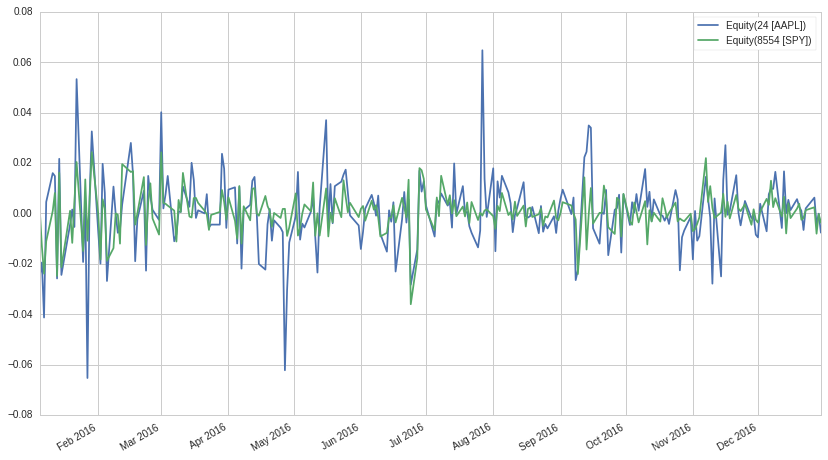

In [6]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

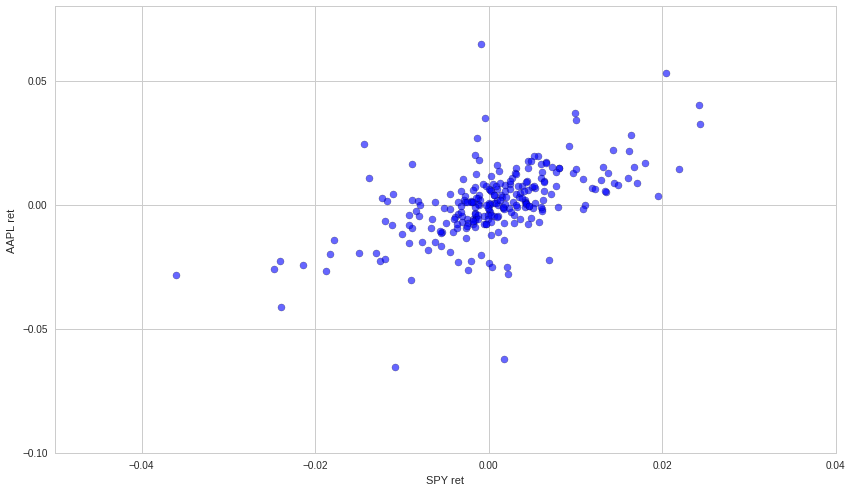

In [7]:
plt.scatter(bench_ret, asset_ret, alpha = 0.6, s=50)
plt.xlabel('SPY ret')
plt.ylabel('AAPL ret')

In [8]:
AAPL = asset_ret.values
spy = bench_ret.values


In [12]:
#getting an alpha
spy_constant = sm.add_constant(spy)

In [33]:
#spy_constant


In [14]:
model = regression.linear_model.OLS(AAPL, spy_constant).fit()

In [15]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [19]:
alpha, beta = model.params

In [20]:
alpha

1.6799024809993564e-05

In [18]:
beta

1.0298136979465768

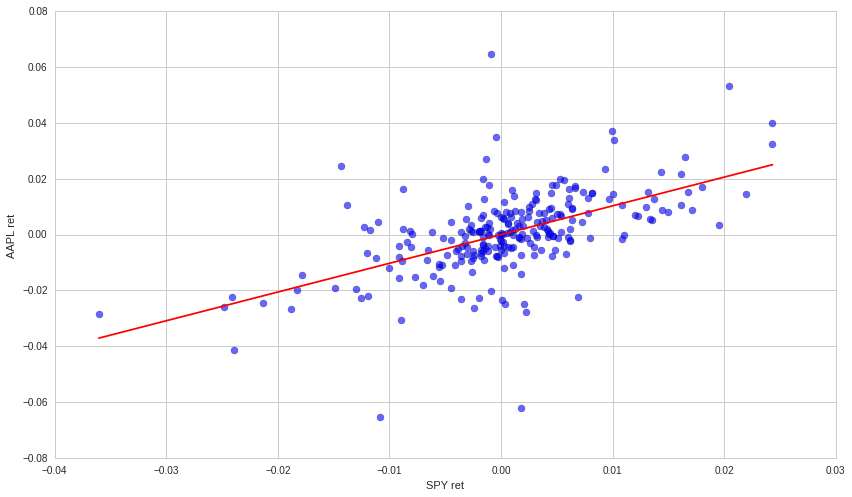

In [24]:
min_spy, max_spy = bench_ret.values.min(), bench_ret.values.max()

spy_line = np.linspace(min_spy, max_spy, 100)
y = spy_line * beta + alpha

plt.plot(spy_line, y, 'red')

plt.scatter(bench_ret, asset_ret, alpha = 0.6, s=50)
plt.xlabel('SPY ret')
plt.ylabel('AAPL ret')

In [27]:
hedged = (-beta * bench_ret) + asset_ret

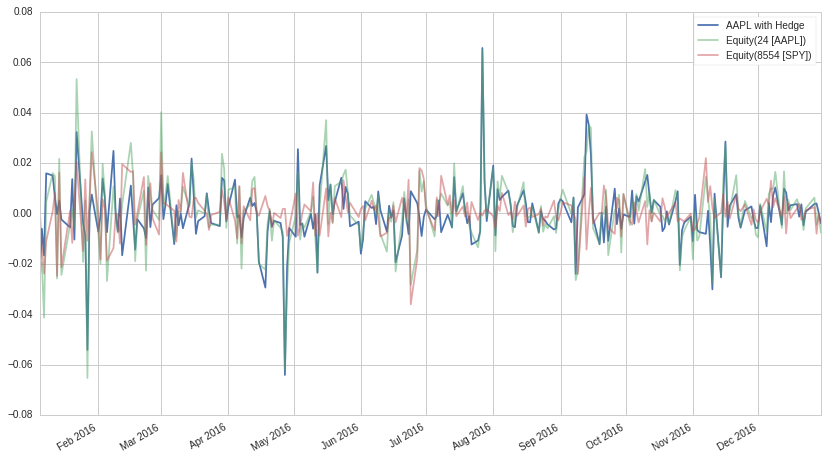

In [31]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha = 0.5)
bench_ret.plot(alpha = 0.5)
plt.legend()

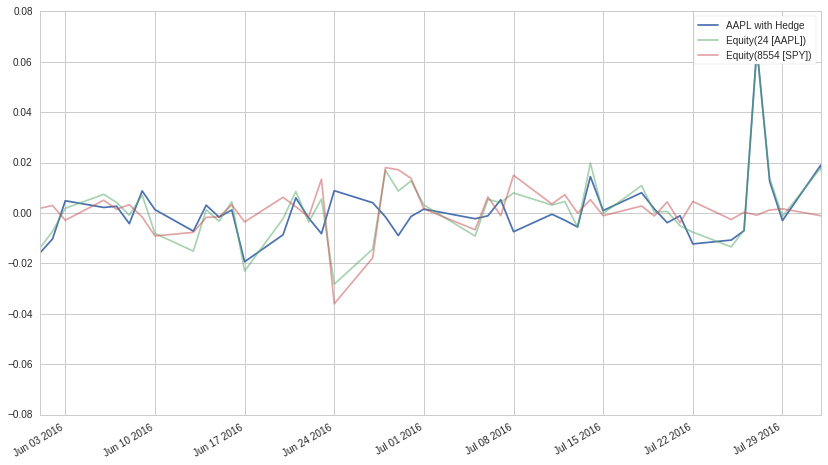

In [32]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha = 0.5)
bench_ret.plot(alpha = 0.5)
plt.xlim(['2016-06-01', '2016-08-01'])
plt.legend()

In [34]:
# Wrapping it up for any given stock 
def alpha_beta(benchmark_ret, stock):
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock, benchmark).fit()
    
    return model.params[0], model.params[1]

In [37]:
# Get the alpha and beta estimates over the last year
start = '2016-01-01'
end = '2017-01-01'

asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

#same as asset_ret2016, but without the timestamp information
aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

2016 Based Figures
alpha: 1.679902481e-05
beta: 1.02981369795


In [48]:
# Create hedged portfolio and compute alpha and beta
# Eliminating the market beta
portfolio = -beta2016 * benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016, portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))
print("Beta is very small")

Portfolio with Alphas and Betas:
alpha: 1.679902481e-05
beta: 1.36609473733e-16
Beta is very small


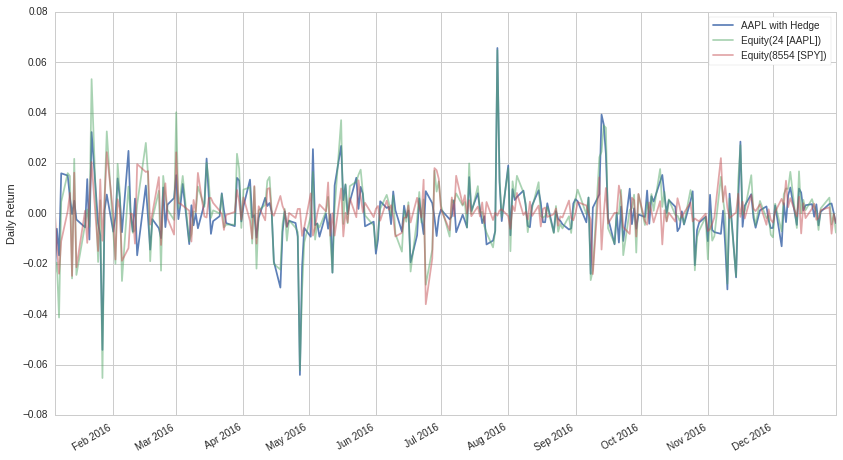

In [51]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha = 0.9, label='AAPL with Hedge')

asset_ret2016.plot(alpha = 0.5);
benchmark_ret2016.plot(alpha =  0.5)
plt.ylabel("Daily Return")
plt.legend();

In [52]:
portfolio.mean()

1.6799024809993652e-05

In [53]:
asset_ret2016.mean()

0.000574549568770769

In [54]:
portfolio.std()

0.012065447808277703

In [55]:
asset_ret2016.std()

0.014702747344261722

We reduced our return dramatically in an exchange for a small decline in standard deviation.
Possible reason here is that Apple's cap is so huge that its movement affect the market by itself